<a href="https://colab.research.google.com/github/manamdhanya/LGMVIP/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data1=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [5]:
data1.tail() #displays last 5 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data1.head()#displays first 5 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
data1['Date'] = pd.to_datetime(data1['Date']) #sort according to date and time
dp = data1.sort_values(by='Date')
dp.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
dp.reset_index(inplace=True)
dp.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


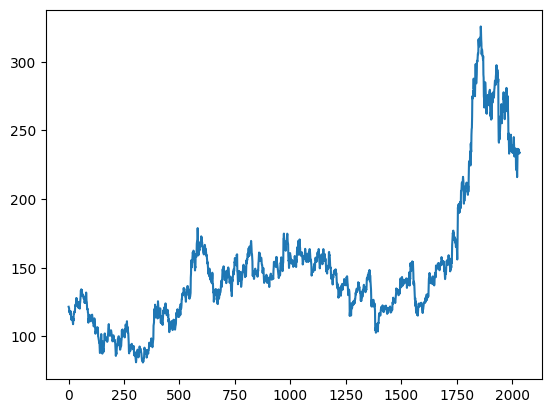

In [13]:
plt.plot(dp['Close'])#visualise in form of graph

In [15]:
dp1 = dp['Close']
scaler = MinMaxScaler(feature_range=(0,1))
dp1 = scaler.fit_transform(np.array(dp1).reshape(-1,1))
dp1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [16]:
trainingsize=int(len(dp1)*0.70)
testsize=len(dp1)-trainingsize
traindata = dp1[0:trainingsize,:]
testdata = dp1[trainingsize:len(dp1),:1]
trainingsize,testsize

(1424, 611)

In [17]:
def datasetcr(dataset,timestep=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-timestep-1):
    a=dataset[i:(i+timestep),0]
    dataX.append(a)
    dataY.append(dataset[i+timestep,0])
  return np.array(dataX),np.array(dataY)

In [18]:
timestep=100
X_train , Y_train = datasetcr(traindata,timestep)
X_test , Y_test = datasetcr(testdata,timestep)

In [21]:
print(X_train.shape),print(Y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [22]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 13s 352ms/step - loss: 0.0106 - val_loss: 0.0015
Epoch 2/60
19/19 [==============================] - 4s 208ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 4s 204ms/step - loss: 9.8391e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 5s 279ms/step - loss: 8.8737e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 4s 209ms/step - loss: 8.6929e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 213ms/step - loss: 8.4425e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 5s 284ms/step - loss: 8.1934e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 205ms/step - loss: 7.8114e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 210ms/step - loss: 7.5176e-04 - val_loss: 9.7662e-04
Epoch 10/60
19/19 [==============================] - 5s 283ms/step 

In [30]:
test_predit=model.predict(X_test)#preditiction of scaled test data
test_predit1=scaler.inverse_transform(test_predit)
test_predit1

16/16 [==============================] - 2s 44ms/step


array([[140.0904  ],
       [140.24767 ],
       [139.21866 ],
       [136.34042 ],
       [134.83072 ],
       [134.5181  ],
       [135.93748 ],
       [137.54166 ],
       [137.70583 ],
       [137.16425 ],
       [136.94897 ],
       [138.383   ],
       [139.19704 ],
       [140.83195 ],
       [143.08269 ],
       [140.48769 ],
       [137.90062 ],
       [137.85823 ],
       [138.72224 ],
       [144.27853 ],
       [148.57649 ],
       [150.19624 ],
       [150.12444 ],
       [147.75764 ],
       [147.89319 ],
       [147.82686 ],
       [148.29405 ],
       [150.07455 ],
       [150.59068 ],
       [150.36555 ],
       [150.75859 ],
       [149.42743 ],
       [145.92699 ],
       [140.00793 ],
       [136.95782 ],
       [136.412   ],
       [136.74316 ],
       [135.76382 ],
       [133.21043 ],
       [129.40863 ],
       [127.14057 ],
       [126.284546],
       [124.23798 ],
       [123.56836 ],
       [121.479294],
       [118.81128 ],
       [118.33586 ],
       [118.1

In [34]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(Y_test,test_predit1))

202.17553590128756